#Sprint 4, T01

##Nivell 1

###Execise 1 - Graphic analysis: Unique Carrier

In [180]:
import matplotlib.pyplot as plt, mpld3
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np

df =  pd.read_csv('DelayedFlights.csv')

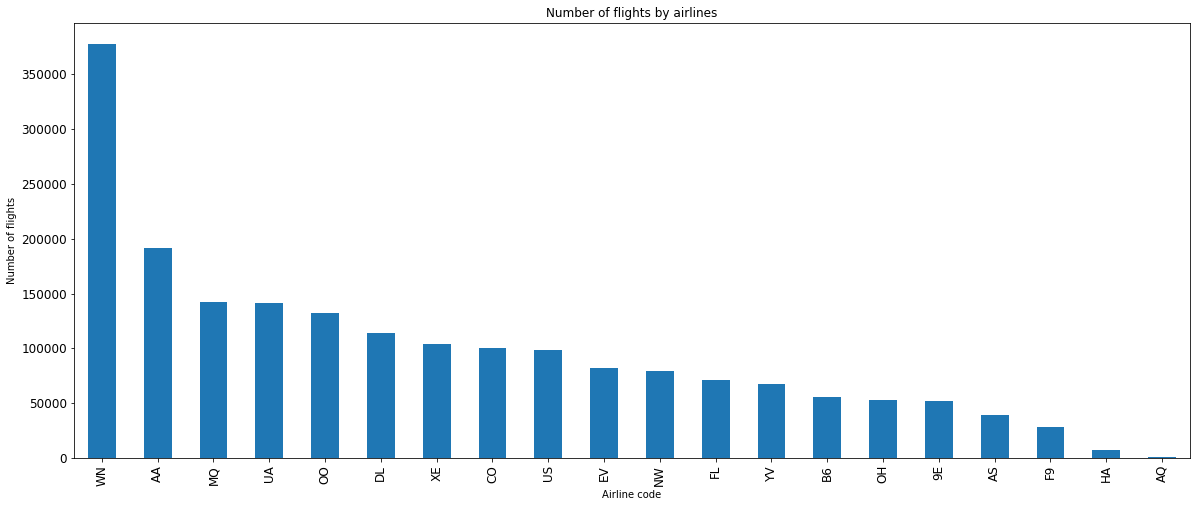

In [155]:
# FIRST OPTION - simple way how to show values from a group
df['UniqueCarrier'].value_counts().plot.bar(figsize=(20, 8), 
                                            fontsize=12, 
                                            title='Number of flights by airlines', 
                                            ylabel='Number of flights',
                                            xlabel='Airline code')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

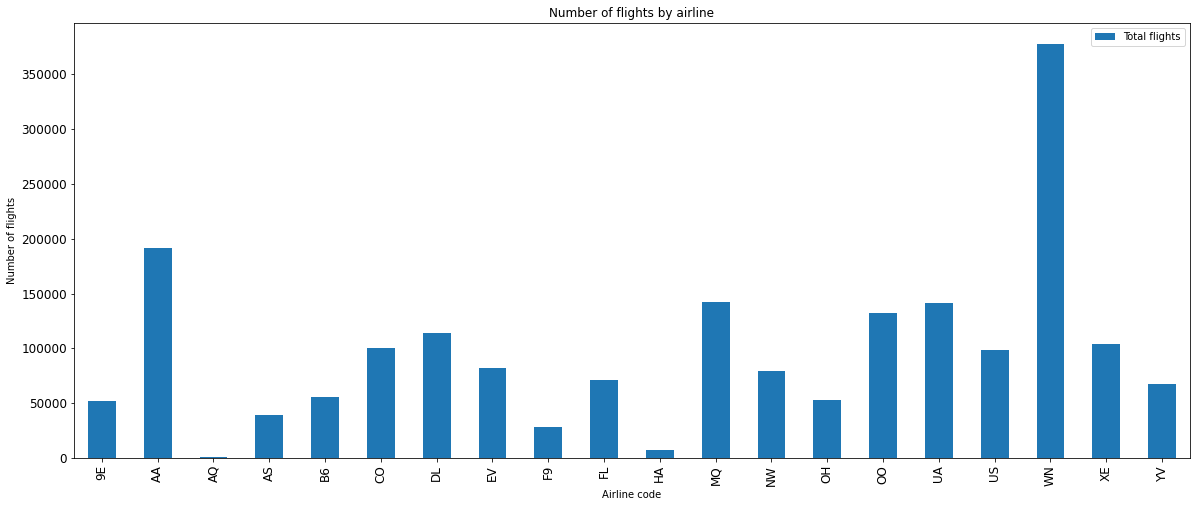

In [194]:
# SECOND OPTION - creating a dataframe first and than diagram
var = df.groupby('UniqueCarrier')['UniqueCarrier'].count()
new_df = pd.Series(var, name='Total flights')
new_df.to_frame()
new_df = new_df.reset_index()
new_df

new_df.plot.bar(x="UniqueCarrier", xlabel="Airline code",
                y="Total flights", ylabel="Number of flights",
                rot=90, title="Number of flights by airline",
                figsize=(20, 8), fontsize=12,)

plt.savefig('fig1.png')
plt.show

###Execise 1 - Graphic analysis: ArrDelay

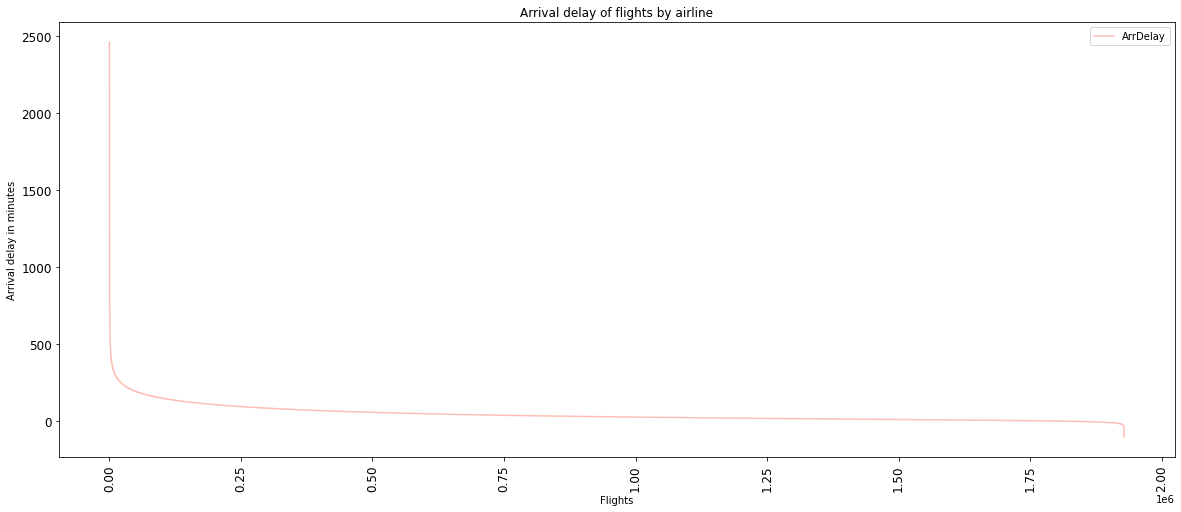

In [193]:
var = df['ArrDelay']
new_df = pd.Series(var, name='ArrDelay')
new_df.to_frame()
new_df = new_df.reset_index()#to create a new dataframe
new_df.sort_values(by='ArrDelay', ascending=False, inplace=True)#sorting the values
new_df = new_df.dropna()#cleaning nan values
new_df['IndexHelp'] = np.arange(len(new_df))#adding column of custom index numbers

new_df.plot(x="IndexHelp", xlabel="Flights",
            y="ArrDelay", ylabel="Arrival delay in minutes",
            rot=90, title="Arrival delay of flights by airline",
            figsize=(20, 8), fontsize=12,
            color='#fdbfb5')

plt.savefig('fig2.png')
plt.show(close=None, block=None)

###Execise 1 - Graphic analysis: ArrDelay + UniqueCarrier

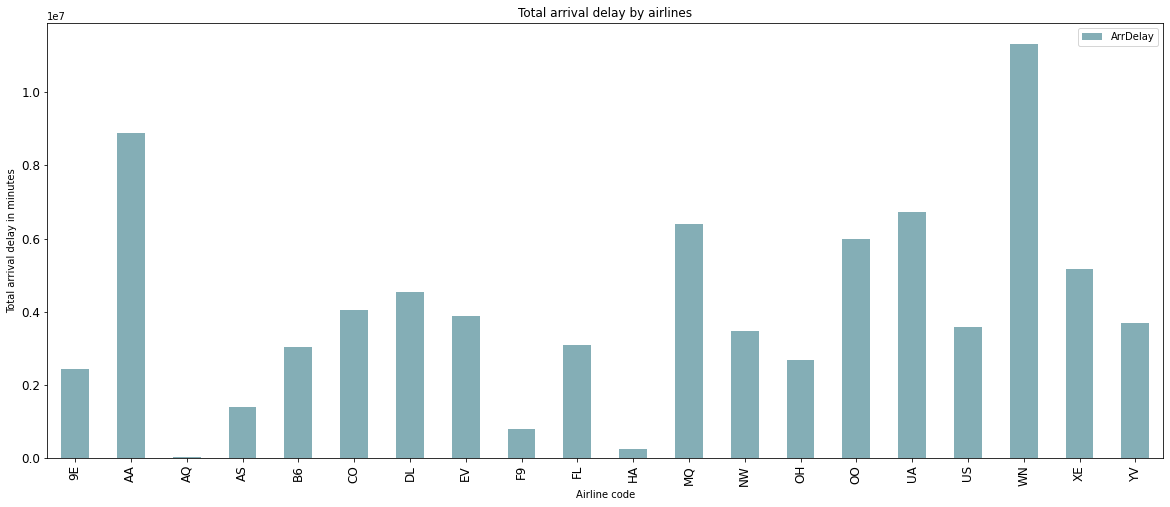

In [192]:
var = df[['ArrDelay','UniqueCarrier']]
new_df = var.groupby([('UniqueCarrier')])[['ArrDelay']].sum()
new_df = new_df.reset_index()
new_df
new_df.plot.bar(x="UniqueCarrier", xlabel="Airline code",
            y="ArrDelay", ylabel="Total arrival delay in minutes",
            rot=90, title="Total arrival delay by airlines",
            figsize=(20, 8), fontsize=12,
            color='#84aeb6')

plt.savefig('fig3.png')
plt.show(close=None, block=None)

###Execise 1 - Graphic analysis: ArrDelay + DepDelay

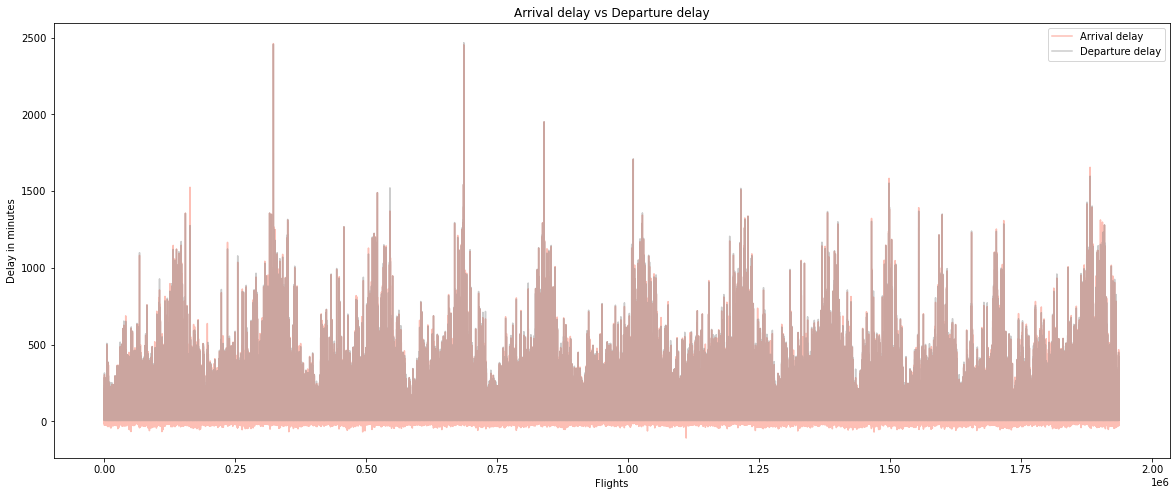

In [191]:
my_df = df[['ArrDelay','DepDelay']]
new_df = my_df.dropna()

y1 = new_df['ArrDelay']
y2 = new_df['DepDelay']
fig, ax = plt.subplots(figsize=(20, 8))

plt.plot(y1,color='#fdbfb5')
plt.plot(y2, color='#808080', alpha=0.4)
plt.title("Arrival delay vs Departure delay")
plt.xlabel("Flights")
plt.ylabel("Delay in minutes")
plt.legend(['Arrival delay', 'Departure delay']);

plt.savefig('fig4.png')
plt.show(close=None, block=None)

###Execise 1 - Graphic analysis: ArrDelay + DepDelay + UniqueCarrier

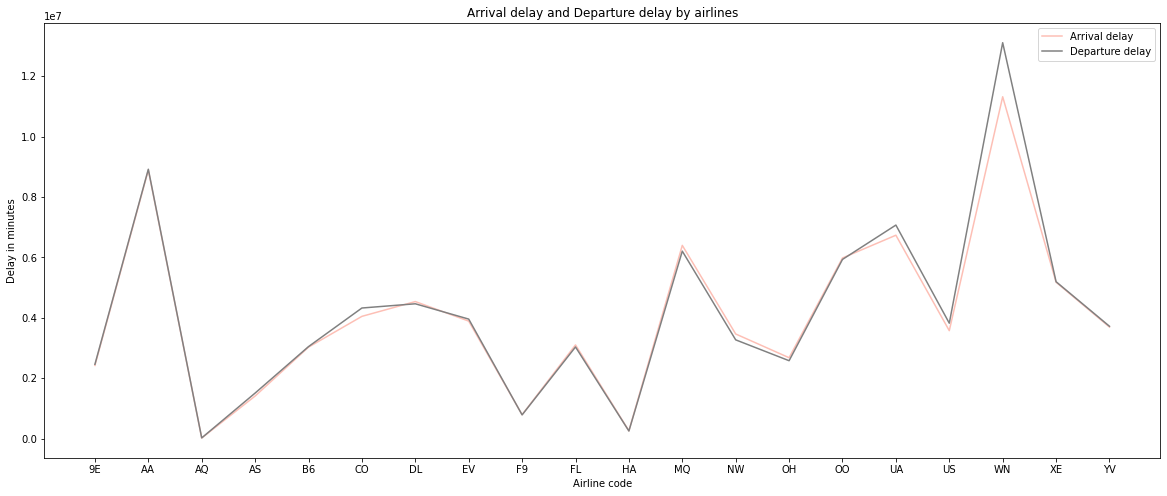

In [190]:
var = df[['ArrDelay','DepDelay','UniqueCarrier']]
new_df = my_df.dropna()
new_df = var.groupby([('UniqueCarrier')])[['ArrDelay','DepDelay' ]].sum()
new_df = new_df.reset_index()
new_df

y1 = new_df['ArrDelay']
y2 = new_df['DepDelay']
y3 = new_df['UniqueCarrier']
fig, ax = plt.subplots(figsize=(20, 8))

plt.plot(y3, y1,color='#fdbfb5')
plt.plot(y3, y2, color='#808080')
plt.title("Arrival delay and Departure delay by airlines")
plt.xlabel("Airline code")
plt.ylabel("Delay in minutes")
plt.legend(['Arrival delay', 'Departure delay']);

plt.savefig('fig5.png')
plt.show(close=None, block=None)

###Execise 1 - Graphic analysis: ArrDelay + DepDelay + UniqueCarrier + AirTime

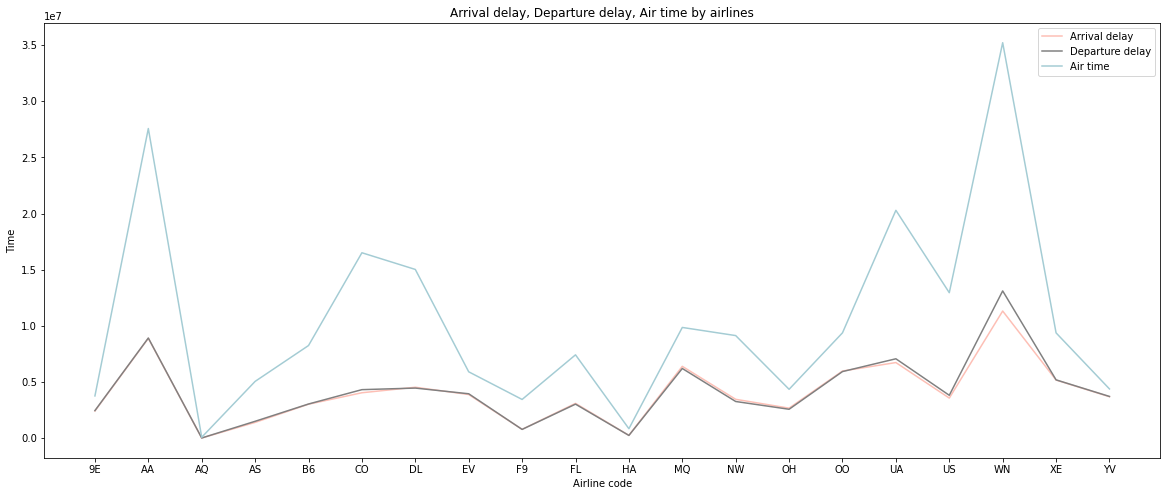

In [189]:
var = df[['ArrDelay','DepDelay','UniqueCarrier','AirTime']]
new_df = my_df.dropna()
new_df = var.groupby([('UniqueCarrier')])[['ArrDelay','DepDelay', 'AirTime']].sum()
new_df = new_df.reset_index()
new_df

y1 = new_df['ArrDelay']
y2 = new_df['DepDelay']
y3 = new_df['AirTime']
y4 = new_df['UniqueCarrier']
fig, ax = plt.subplots(figsize=(20, 8))

plt.plot(y4, y1,color='#fdbfb5')
plt.plot(y4, y2, color='#808080')
plt.plot(y4, y3, color='#a4ccd4')
plt.title("Arrival delay, Departure delay, Air time by airlines")
plt.xlabel("Airline code")
plt.ylabel("Time")
plt.legend(['Arrival delay', 'Departure delay', 'Air time']);

plt.savefig('fig6.png')
plt.show(close=None, block=None)

###Execise 2 - Export diagrams to HTML

In [182]:
#first option
#plt.savefig('fig6.png')

#second option
#mpld3.save_html(fig, 'fig6.html')

###Execise 3 - Integration to Sprint3_T05

In [ ]:
#from IPython import display
#display.Image("https://raw.githubusercontent.com/dominikapetru/visualitzacio_exploratoria/main/fig1.png")